In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline#для створення пайплайну

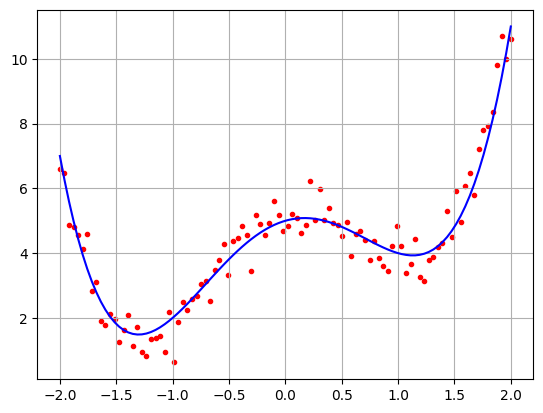

In [3]:
# generation of synthetic dataset

N = 100#кількість точок даних
x = np.linspace(-2, 2, N)#створюється 100 рівномірно розподілених точок від -2 до 2
y = x ** 2 - 3#квадратична функція
noise = np.random.normal(0, .5, N) # тут додається шум з нормальним розподілом 

# original function
y0 = x**4 - 3* x**2 +x + 5#оригінальна функція 4-го степеню

# "real data"
y = y0 + noise# дтут додається шум до оригінальної функції

plt.grid() #сітка
plt.scatter(x, y, marker = '.', color = 'r')#точкова діаграма червоного кольору
plt.plot(x, y0, color='b')#лінійний графік

Підготовка даних для sklearn

In [4]:
# Reshape for sklearn
x = x.reshape(-1, 1) #перетворює x в стовпець (у sklearn працює тільки 2D масив)

In [5]:
# Polynomial regression (degree=4, since the true function is quartic)
degree = 4# степінь полінома
# далі пайплайн(це послідовність етапів, дій) з поліноміальними ознаками і лінійною регресією
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

model.fit(x, y)#навчання моделі на даних;

,steps,"[('polynomialfeatures', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,4
,interaction_only,False
,include_bias,True
,order,'C'
,fit_intercept,True
,copy_X,True
,tol,1e-06


Генерація прогнозів

In [6]:
x_fit = np.linspace(-2, 2, 200).reshape(-1, 1)#200 точок для гладкої кривої
y_fit = model.predict(x_fit)#прогнозування значень для нових точок

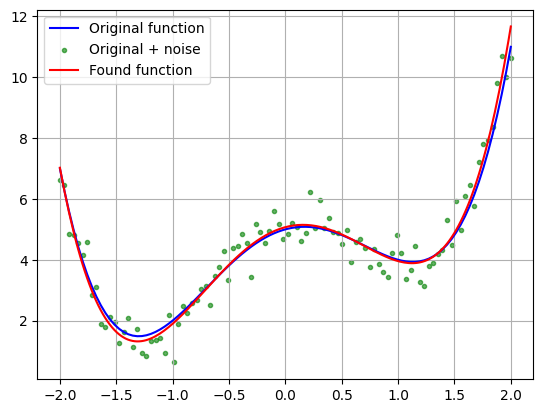

In [7]:
plt.grid()
plt.plot(x, y0, "b", label="Original function")#оригінальна функція синім кольором
#зашумлені дані зеленим кольором з прозорістю для наглядності
plt.scatter(x, y, color="g", marker =".", label="Original + noise", alpha=0.6)
plt.plot(x_fit, y_fit, "r", label="Found function")#знайдена функція червоним кольором
plt.legend()

Отримання параметрів моделі

In [8]:
# accessing arguments found
#тримується об'єкт лінійної регресії з пайплайну вище
linreg = model.named_steps["linearregression"]

In [9]:
# coefficients
linreg.coef_#коефіцієнти при змінних

array([ 0.        ,  0.9858734 , -3.21737318,  0.04378932,  1.07154063])

In [10]:
# shift
linreg.intercept_ #вільний член (зсув, константа)

np.float64(5.072093330432309)

In [11]:
# тут об'єднується вільний член і коефіцієнти в один масив
all = np.hstack(([linreg.intercept_], linreg.coef_[1:]))
all
#  (виводить всі коефіцієнти) :        5     +       x          + x^2    +    x^3     +    x^4

array([ 5.07209333,  0.9858734 , -3.21737318,  0.04378932,  1.07154063])

Цікава фіча у вигляді оцінки метрики якості;

In [12]:
from sklearn.metrics import mean_squared_error, r2_score  #імпортую функції для обчислення метрик
# Обчислення точності
y_pred = model.predict(x)#прогнозування значень для оригінальних точок x
mse = mean_squared_error(y, y_pred)#тут середньоквадратична помилка (MSE)
r2 = r2_score(y, y_pred)#коефіцієнт детермінації R²

#MSE - cередньоквадратична помилка, показує середнє квадратів різниць між справжніми і прогнозованими значеннями
# R² - коефіцієнт детермінації, тобто яка частка варіації залежної змінної пояснює модель ( 0 або 1)

print(f"Середньоквадратична помилка: {mse:.3f}")#вивожу MSE з точністю до 3 знаків
print(f"Коефіцієнт детермінації R²: {r2:.3f}")# тепер R² з точністю до 3 знаків

#Порівняння коефіцієнтів
print(f"\nСправжні коефіцієнти: [5, 1, -3, 0, 1]")#справжні коефіцієнти функції y0 = x**4 - 3*x**2 + x + 5
print(f"коеф що знайшли: {all.round(3)}")#знайдені коефіцієнти, округлені до 3 знаків

#тепер до оцінки якості;
#Якщо r2 > 0.95, тоді R² більше 0.95, вважаємо що це дуже висока якість
if r2 > 0.95:
    print("Модель дуже добре підходить до даних!")
elif r2 > 0.8:# якщо R² більше 0.8 але менше 0.95 - непогана якість, ну хороша
    print("Модель добре підходить до даних")
else:# в іншому випадку, якщо R² менше 0.8 - вже погана
    #Є похибки, але опускаємо їх
    print(" Модель потребує покращення")


Середньоквадратична помилка: 0.235
Коефіцієнт детермінації R²: 0.943

Справжні коефіцієнти: [5, 1, -3, 0, 1]
коеф що знайшли: [ 5.072  0.986 -3.217  0.044  1.072]
Модель добре підходить до даних
